# **Lab - 4**

**ID:** 180041120

**Course Code:** 4734

**Course Name:** Digital Image Processing

In [155]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Task-1 Point Processing

In [17]:
def rgb_to_neg(image):
  #image: an rgb cv2 image object
  img_array = np.array(image)
  (r, g, b) = (img_array[:,:,0],img_array[:,:,1],img_array[:,:,2])
  (neg_r, neg_g, neg_b) = (255-r, 255-g, 255-b)
  img_neg_rgb = np.dstack((neg_r, neg_g, neg_b))
  return img_neg_rgb

In [18]:
def hsv_to_neg(image):
  #image: an hsv cv2 image object
  img_array = np.array(image)
  (h, s, v) = (img_array[:,:,0],img_array[:,:,1],img_array[:,:,2])
  #print(np.max(h), np.max(s), np.max(v))
  #print(np.min(h), np.min(s), np.min(v))
  neg_h = (h + 90 ) % 180
  neg_s = s + 10
  neg_v = 255 - v
  img_neg_hsv = np.dstack((neg_h, neg_s, neg_v))
  return img_neg_hsv

In [21]:
#Original Image
img_strw = cv2.imread("/content/Fig0630(01)(strawberries_fullcolor).tif")
img_strw_rgb = cv2.cvtColor(img_strw, cv2.COLOR_BGR2RGB)   # BGR -> RGB

#RGB Negative Image
img_rgb_neg = rgb_to_neg(img_strw_rgb)  # RGB -> RGB_NEG

#HSV Negative Image
hsv_img = cv2.cvtColor(img_strw, cv2.COLOR_RGB2HSV) # RGB -> HSV
img_hsv_neg = hsv_to_neg(hsv_img)
hsv_out = cv2.cvtColor(img_hsv_neg, cv2.COLOR_HSV2BGR)

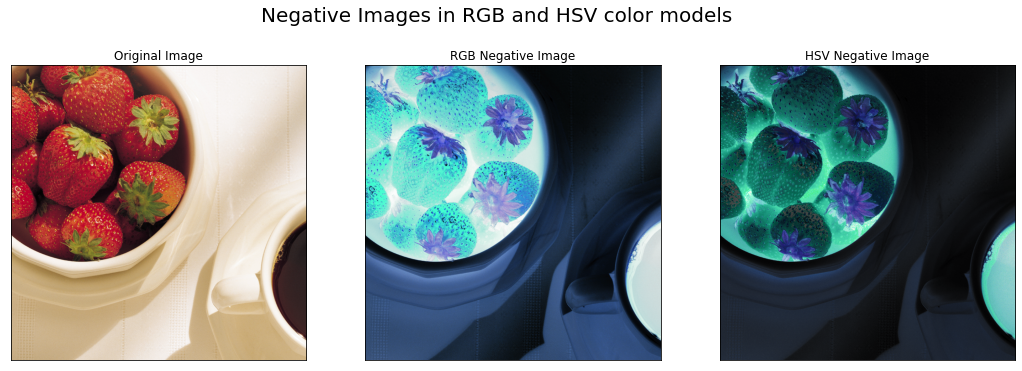

In [152]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

ax[0].imshow(np.array(img_strw_rgb))
ax[0].xaxis.set_ticks([])
ax[0].yaxis.set_ticks([])
ax[0].title.set_text('Original Image')

ax[1].imshow(img_rgb_neg)
ax[1].xaxis.set_ticks([])
ax[1].yaxis.set_ticks([])
ax[1].title.set_text('RGB Negative Image')

ax[2].imshow(hsv_out)
ax[2].xaxis.set_ticks([])
ax[2].yaxis.set_ticks([])
ax[2].title.set_text('HSV Negative Image')

fig.suptitle('Negative Images in RGB and HSV color models', fontsize=20)
plt.show() 

**Question:** What differences are noticed between the RGB-negative and HSV-negative?

**Answer:** The HSV Negative image appears to be darker and the colors appear to be more vivid than its RGB counterpart. The possible reason behind this is that the HSV color model is an approximation of the HSI color model. And thus, by applying the same negative transformation of HSI on an HSV color model, we may not get the expected results. In HSI color model, the color components are decoupled from the intensity component. But, in HSV, the color components are not entirely decoupled from the intensity component, and thus negation in the v-component also affects the color of the image and changes its vividity.

## Task-2 Histogram Equalization

In [9]:
def rgb_to_eq(image):
  #image: an rgb cv2 image object
  img_array = np.array(image)
  (r, g, b) = (img_array[:,:,0],img_array[:,:,1],img_array[:,:,2])
  (eq_r, eq_g, eq_b) = (cv2.equalizeHist(r), cv2.equalizeHist(g), cv2.equalizeHist(b))
  img_eq_rgb = np.dstack([eq_r, eq_g, eq_b])
  return img_eq_rgb

In [13]:
def hsv_to_eq(image):
  #image: an hsv cv2 image object
  img_array = np.array(image)
  (h, s, v) = (img_array[:,:,0], img_array[:,:,1], img_array[:,:,2])
  s_eq = np.clip(s,0,255)
  v_eq = cv2.equalizeHist(v)
  img_eq_hsv = np.dstack([h, s_eq, v_eq])
  return img_eq_hsv

In [14]:
img_caster = cv2.imread("/content/Fig0637(a)(caster_stand_original).tif")

img_caster_rgb = cv2.cvtColor(img_caster, cv2.COLOR_BGR2RGB)   # BGR -> RGB
img_rgb_eq = rgb_to_eq(img_caster_rgb)  # RGB -> RGB_EQ

hsv_img = cv2.cvtColor(img_caster, cv2.COLOR_BGR2HSV) # BGR -> HSV
img_hsv_eq = hsv_to_eq(hsv_img)
img_hsv_eq_rgb = cv2.cvtColor(img_hsv_eq, cv2.COLOR_HSV2RGB)

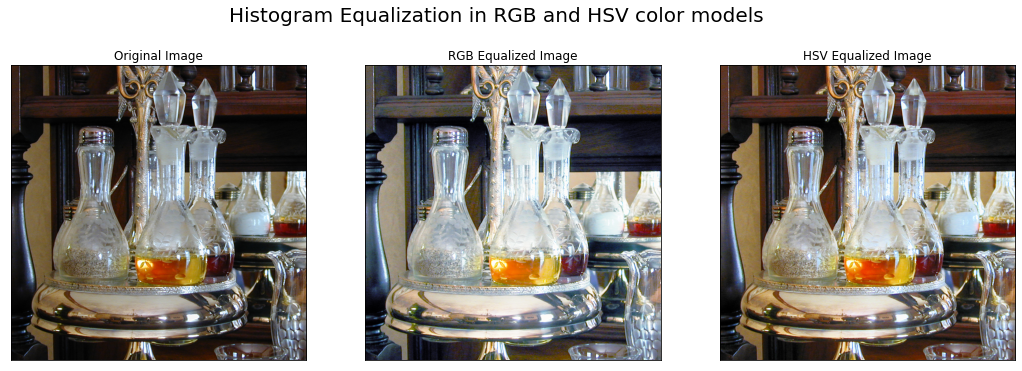

In [153]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

ax[0].imshow(np.array(img_caster_rgb))
ax[0].xaxis.set_ticks([])
ax[0].yaxis.set_ticks([])
ax[0].title.set_text('Original Image')

ax[1].imshow(img_rgb_eq)
ax[1].xaxis.set_ticks([])
ax[1].yaxis.set_ticks([])
ax[1].title.set_text('RGB Equalized Image')

ax[2].imshow(img_hsv_eq_rgb)
ax[2].xaxis.set_ticks([])
ax[2].yaxis.set_ticks([])
ax[2].title.set_text('HSV Equalized Image')

fig.suptitle('Histogram Equalization in RGB and HSV color models', fontsize=20)
plt.show() 

**Question:** Does the HE result become same for both RGB and HSV models?

**Answer:** The HE result on HSV model appears to have better contrast than the HE result in the RGB model. If we look carefully, the image appears to be significantly brigher in the RGB equalized image, especially if we look at the background. In the HSV equalized image, the background retains the darkness from the original image and thus forming a better contrast with the object in the image. The RGB equalized image appears to be slightly washed out due to the increased brightness compared to the HSV equalized image. The reason behind this is that, in HSV color model, the color information is decoupled from the intensity information. Hence, a transformation such as HE on intesity doesn't affect the color information. However, in RGB the color also gets equalized and thus produces undesireable results with a worse contrast. Hence, HSV HE is preferable to RGB HE.

## Task-3 Linear Filter

In [23]:
def linear_filter(image, filter, scaling = 0):
  img = np.array(image)
  out_img = np.zeros(img.shape)

  x_fil, y_fil = filter.shape
  if x_fil%2 == 0 or x_fil != y_fil: #Not Allowing Even Filters or Rectangular Filters but can be modified if needed
    print("Error: Wrong Filter Size")
    return

  pad_len = int((x_fil-1)/2) #Padding the Image to preserve the Image Size after Convolution
  img_pad = np.pad(img, pad_width = pad_len)
  x_img, y_img = img_pad.shape

  for i in range(x_img - x_fil): #Looping over the X-Axis
    for j in range(y_img - y_fil): #Looping over the Y-Axis
      img_slice = img_pad[i:i+x_fil, j:j+y_fil] #Taking a 3x3 Image patch
      out_img[i,j] = np.sum(np.multiply(img_slice, filter)) #Convolution Step
      if scaling == 0:
        out_img[i,j] = min(out_img[i,j], 255) #Incase the value goes beyond 255
        out_img[i,j] = max(out_img[i,j], 0) #Incase the value goes below 0
  return out_img

In [91]:
def lap_sharp_rgb(image, c=1):
  lap_fil = np.array([[ 0, -1, 0],[-1, 4 + c, -1],[ 0, -1, 0]]) #Laplacian Response Array
  image_arr = np.array(image)
  
  r,g,b = image_arr[:,:,0], image_arr[:,:,1], image_arr[:,:,2]
  
  r_res = linear_filter(r, lap_fil, scaling = 0)
  g_res = linear_filter(g, lap_fil, scaling = 0)
  b_res = linear_filter(b, lap_fil, scaling = 0)

  lap_img = np.dstack([r_res, g_res, b_res])

  lap_img_scaled = ((lap_img - np.min(lap_img))/(np.max(lap_img) - np.min(lap_img))) #Normalizing
  lap_img_scaled = np.array(lap_img_scaled, dtype = np.float32)

  return lap_img_scaled

In [92]:
def lap_sharp_hsv(image, c=1):
  lap_fil = np.array([[ 0, -1, 0],[-1, 4 + c, -1],[ 0, -1, 0]]) #Laplacian Response Array
  img_array = np.array(image)

  h, s, v = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]

  lap_res_v = linear_filter(v, lap_fil, scaling = 0)
  lap_res_v_scaled = (lap_res_v - np.min(lap_res_v))/(np.max(lap_res_v) - np.min(lap_res_v))
  lap_res_v_scaled = lap_res_v_scaled*255
  lap_res_v_scaled = np.floor(lap_res_v_scaled)

  lap_res = np.dstack([h,s,lap_res_v_scaled])
  lap_res = np.array(lap_res, dtype = np.uint8)
  lap_res_rgb = cv2.cvtColor(lap_res, cv2.COLOR_HSV2RGB)
  return lap_res_rgb

In [93]:
img_girl_hsv = cv2.cvtColor(img_girl, cv2.COLOR_BGR2HSV)
img_sharp_hsv = lap_sharp_hsv(img_girl_hsv)

In [94]:
img_girl = cv2.imread('/content/Fig0646(a)(lenna_original_RGB).tif')
img_girl_rgb = cv2.cvtColor(img_girl, cv2.COLOR_BGR2RGB) 

img_sharp_rgb = lap_sharp_rgb(img_girl_rgb)

img_girl_hsv = cv2.cvtColor(img_girl, cv2.COLOR_BGR2HSV)
img_sharp_hsv = lap_sharp_hsv(img_girl_hsv)

diff_img_rgb = np.array(img_sharp_rgb*255) - np.array(img_sharp_hsv) #RGB sharpening image is normalized in [0,1] which HSV is normalized in [0,255]
iff_img_gray = (diff_img_rgb[:,:,0] + diff_img_rgb[:,:,1] + diff_img_rgb[:,:,2])/3

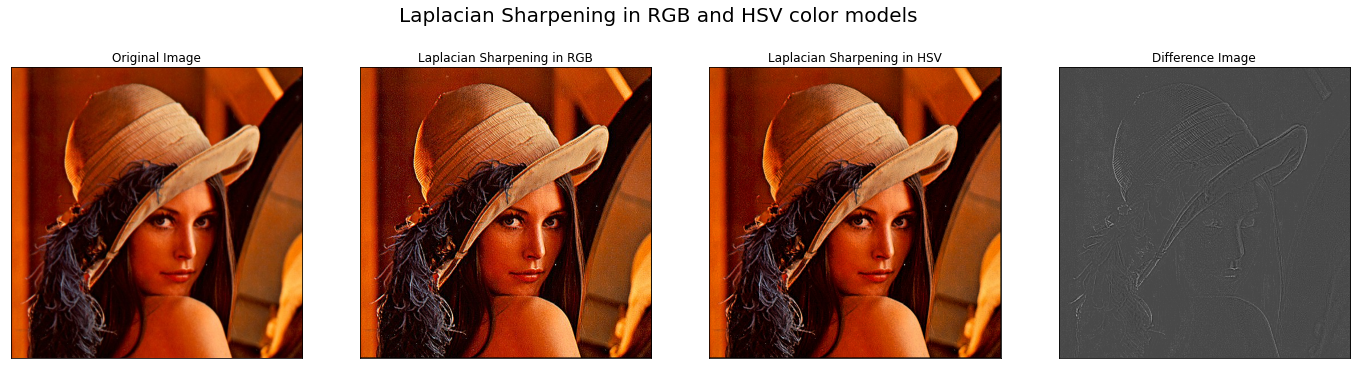

In [154]:
fig, ax = plt.subplots(1,4, figsize=(24,6))

ax[0].imshow(img_girl_rgb)
ax[0].xaxis.set_ticks([])
ax[0].yaxis.set_ticks([])
ax[0].title.set_text('Original Image')

ax[1].imshow(img_sharp_rgb)
ax[1].xaxis.set_ticks([])
ax[1].yaxis.set_ticks([])
ax[1].title.set_text('Laplacian Sharpening in RGB')

ax[2].imshow(img_sharp_hsv)
ax[2].xaxis.set_ticks([])
ax[2].yaxis.set_ticks([])
ax[2].title.set_text('Laplacian Sharpening in HSV')

ax[3].imshow(iff_img_gray, cmap = 'gray')
ax[3].xaxis.set_ticks([])
ax[3].yaxis.set_ticks([])
ax[3].title.set_text('Difference Image')

fig.suptitle('Laplacian Sharpening in RGB and HSV color models', fontsize=20)
plt.show()

**Explanation:** Although both RGB and HSV sharpering images appear to look similar there is a slight difference which can be noticed if we subtract the image arrays. The difference is obviously expected as the transformation is done in different color models where the image information is stored differently.

## Task-4 Non-Linear Filter

In [100]:
def spn_grey(image, min_noise = 300, max_noise = 1000):
    img = np.array(image)
    row, col = img.shape

    #Corrupting to White Pixels
    num_white = np.random.randint(min_noise, max_noise)
    for i in range(num_white):
        x = np.random.randint(0, row - 1) 
        y = np.random.randint(0, col - 1) 
        img[x, y] = 1

    #Corrupting to Black Pixels 
    num_black = np.random.randint(min_noise, max_noise) 
    for i in range(num_black):  
        x = np.random.randint(0, row - 1)
        y = np.random.randint(0, col - 1)
        img[x, y] = 0
      
    return img

In [101]:
def spn_rgb(image, min_noise = 300, max_noise = 1000):
  r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
  r_n = spn_grey(r, min_noise, max_noise)
  g_n = spn_grey(g, min_noise, max_noise)
  b_n = spn_grey(b, min_noise, max_noise)
  img_n = np.dstack([r_n, g_n, b_n])
  return img_n

In [115]:
def median_filter_rgb(image, kernel = 5):
  img_array = np.array(image)
  (r, g, b) = (img_array[:,:,0], img_array[:,:,1], img_array[:,:,2])
  out_r = cv2.medianBlur(r, kernel)
  out_g = cv2.medianBlur(g, kernel)
  out_b = cv2.medianBlur(b, kernel)
  out = np.dstack([out_r, out_g, out_b])
  return out

In [138]:
def median_filter_hsv(image, kernel = 5):
  img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) 
  img_array = np.array(img)
  (h, s, v) = (img_array[:,:,0], img_array[:,:,1], img_array[:,:,2])
  out_h = cv2.medianBlur(h, kernel)
  out_s = cv2.medianBlur(s, kernel)
  out_v = cv2.medianBlur(v, kernel)
  out_img = np.dstack((out_h, out_s, out_v))
  out_img = cv2.cvtColor(out_img, cv2.COLOR_HSV2RGB) 
  return out_img

In [116]:
noisy_img1 = cv2.imread('/content/Fig0650(a)(rgb_image_G_saltpep_pt05).tif')
noisy_img1 = cv2.cvtColor(noisy_img1, cv2.COLOR_BGR2RGB) 
noisy_img2 = spn_rgb(noisy_img1, 5000, 15000)
noisy_img3 = spn_rgb(noisy_img1, 20000, 40000)
noisy_img4 = spn_rgb(noisy_img1, 50000, 75000)
noisy_img5 = spn_rgb(noisy_img1, 100000, 200000)

In [134]:
rgb_fil_1 = median_filter_rgb(noisy_img1, kernel = 5)
rgb_fil_2 = median_filter_rgb(noisy_img2, kernel = 5)
rgb_fil_3 = median_filter_rgb(noisy_img3, kernel = 7)
rgb_fil_4 = median_filter_rgb(noisy_img4, kernel = 11)
rgb_fil_5 = median_filter_rgb(noisy_img5, kernel = 5)

In [146]:
hsv_fil_1 = median_filter_hsv(noisy_img1, kernel = 5)
hsv_fil_2 = median_filter_hsv(noisy_img2, kernel = 5)
hsv_fil_3 = median_filter_hsv(noisy_img3, kernel = 9)
hsv_fil_4 = median_filter_hsv(noisy_img4, kernel = 13)
hsv_fil_5 = median_filter_hsv(noisy_img5, kernel = 13)

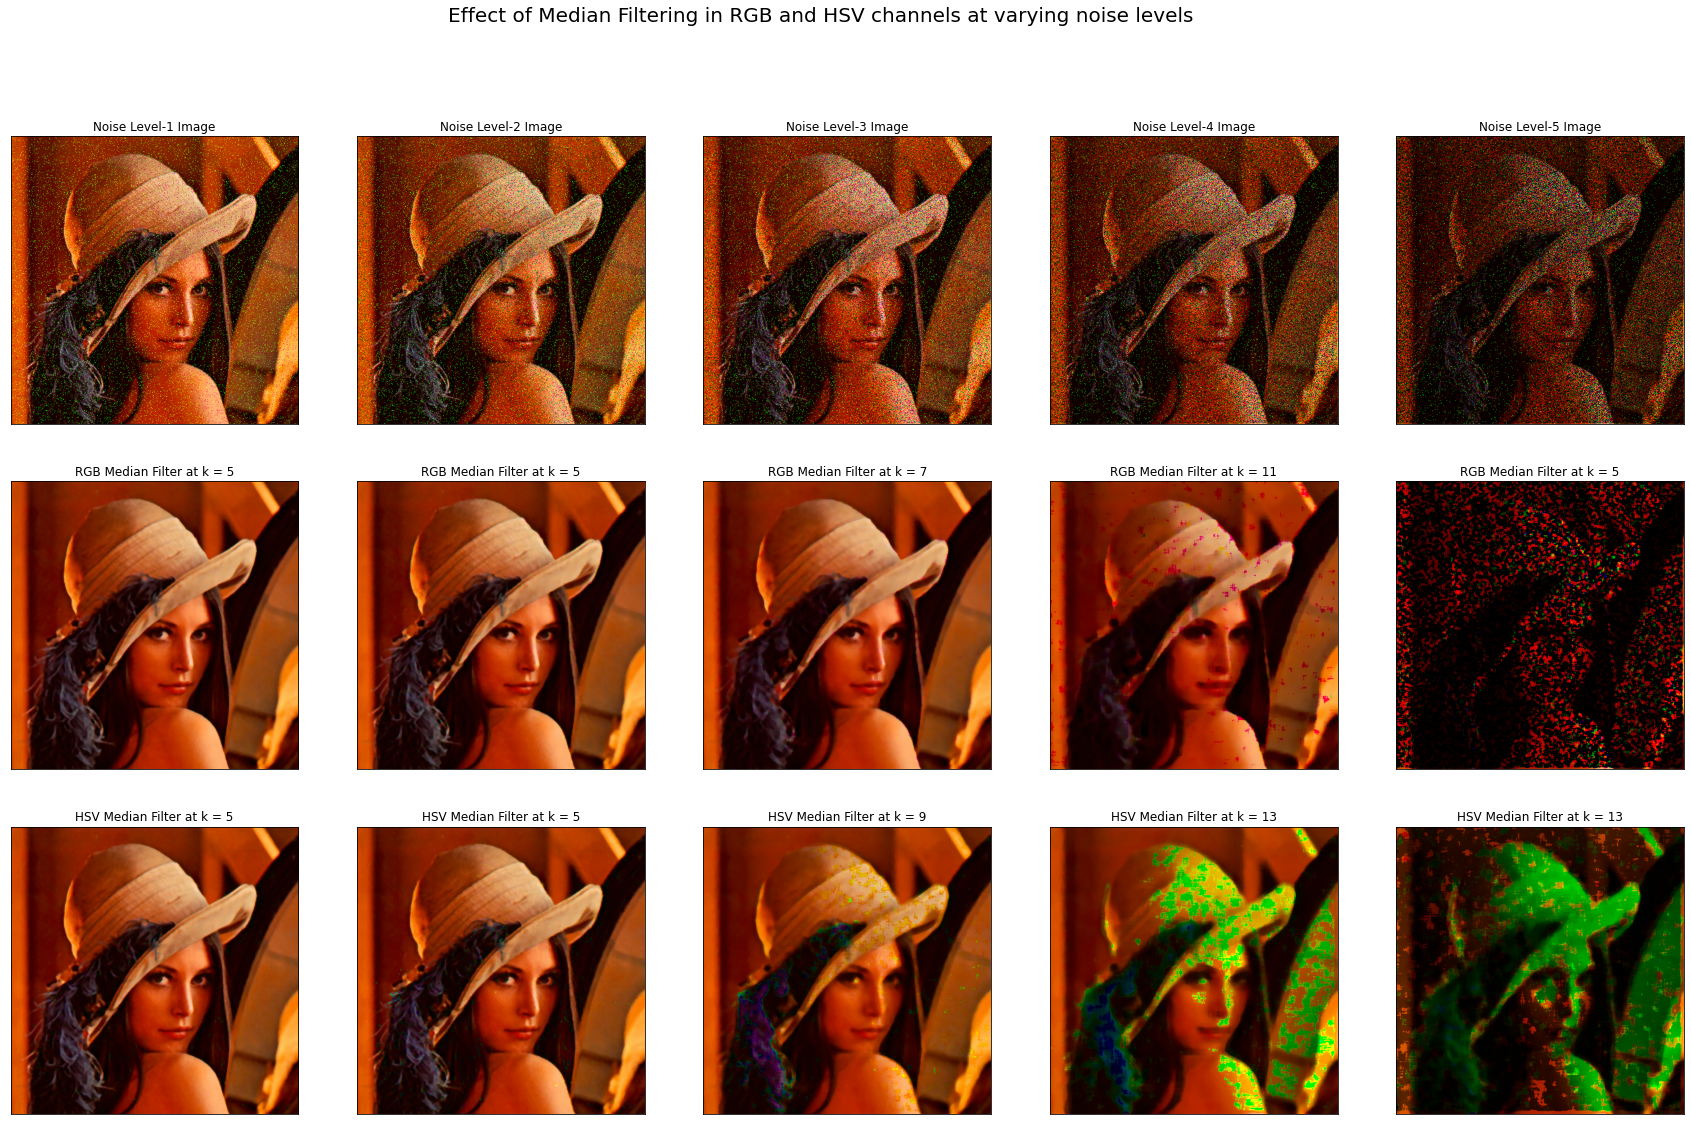

In [150]:
fig, ax = plt.subplots(3,5, figsize=(30,18))

ax[0][0].imshow(noisy_img1)
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Noise Level-1 Image')

ax[0][1].imshow(noisy_img2)
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('Noise Level-2 Image')

ax[0][2].imshow(noisy_img3)
ax[0][2].xaxis.set_ticks([])
ax[0][2].yaxis.set_ticks([])
ax[0][2].title.set_text('Noise Level-3 Image')

ax[0][3].imshow(noisy_img4)
ax[0][3].xaxis.set_ticks([])
ax[0][3].yaxis.set_ticks([])
ax[0][3].title.set_text('Noise Level-4 Image')

ax[0][4].imshow(noisy_img5)
ax[0][4].xaxis.set_ticks([])
ax[0][4].yaxis.set_ticks([])
ax[0][4].title.set_text('Noise Level-5 Image')

ax[1][0].imshow(rgb_fil_1)
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('RGB Median Filter at k = 5')

ax[1][1].imshow(rgb_fil_2)
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('RGB Median Filter at k = 5')

ax[1][2].imshow(rgb_fil_3)
ax[1][2].xaxis.set_ticks([])
ax[1][2].yaxis.set_ticks([])
ax[1][2].title.set_text('RGB Median Filter at k = 7')

ax[1][3].imshow(rgb_fil_4)
ax[1][3].xaxis.set_ticks([])
ax[1][3].yaxis.set_ticks([])
ax[1][3].title.set_text('RGB Median Filter at k = 11')

ax[1][4].imshow(rgb_fil_5)
ax[1][4].xaxis.set_ticks([])
ax[1][4].yaxis.set_ticks([])
ax[1][4].title.set_text('RGB Median Filter at k = 5')

ax[2][0].imshow(hsv_fil_1)
ax[2][0].xaxis.set_ticks([])
ax[2][0].yaxis.set_ticks([])
ax[2][0].title.set_text('HSV Median Filter at k = 5')

ax[2][1].imshow(hsv_fil_2)
ax[2][1].xaxis.set_ticks([])
ax[2][1].yaxis.set_ticks([])
ax[2][1].title.set_text('HSV Median Filter at k = 5')

ax[2][2].imshow(hsv_fil_3)
ax[2][2].xaxis.set_ticks([])
ax[2][2].yaxis.set_ticks([])
ax[2][2].title.set_text('HSV Median Filter at k = 9')

ax[2][3].imshow(hsv_fil_4)
ax[2][3].xaxis.set_ticks([])
ax[2][3].yaxis.set_ticks([])
ax[2][3].title.set_text('HSV Median Filter at k = 13')

ax[2][4].imshow(hsv_fil_5)
ax[2][4].xaxis.set_ticks([])
ax[2][4].yaxis.set_ticks([])
ax[2][4].title.set_text('HSV Median Filter at k = 13')

fig.suptitle('Effect of Median Filtering in RGB and HSV channels at varying noise levels', fontsize=20)
plt.show()

**Explanation:** At varying noise levels, median filtering in both RGB and HSV color spaces appear to do a great job in reducing noise. However, as the noise level gets higher, we need to increase the filter kernel size to reduce the noise. Due to applying a filter with larger kernel, the image gets blurred as well. If the noise level is too high, median filter won't be able to remove the noise and will produce undesireable results.